<a href="https://colab.research.google.com/github/afrenkai/HomeCredit2024/blob/main/DS2010_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Proposal: Home Credit Credit Risk Model Stability

## Members:
 Artem Frenk, Grace Cao, Ronak Wani, Hemankit Vallurupalli, Uma Mandapati

## Description of the Problem:
The problem at hand is to develop a robust credit risk model for Home Credit, a financial institution that specializes in providing loans to individuals with little to no credit history. The objective is to predict the probability of loan default based on various demographic, financial, and behavioral data of the applicants. A stable and accurate credit risk model is crucial for Home Credit to make informed decisions while assessing the creditworthiness of loan applicants and minimizing the risk of default.

## Description of the Dataset:
The dataset provided by Home Credit consists of the following dimensions:
- **Rows:** Number of loan applications
- **Columns:** Various features describing the applicants, such as age, income, employment status, previous credit history, etc.
- **Target Variable:** Binary variable indicating loan default (1) or non-default (0)

Some of the key variables in the dataset include:
- `SK_ID_CURR`: ID of the loan application
- `TARGET`: Target variable indicating loan default
- `NAME_CONTRACT_TYPE`: Type of loan applied for
- `AMT_INCOME_TOTAL`: Applicant's income
- `AMT_CREDIT`: Amount of credit requested
- `DAYS_EMPLOYED`: Number of days employed
- `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`: External credit rating scores

## Regression or Classification:
This is a classification problem since the goal is to predict whether a loan applicant will default or not, which is represented by a binary target variable (default or non-default).

## Methods Planned to Try:
1. **Logistic Regression:** Start with a simple logistic regression model to establish a baseline performance.
2. **Random Forest Classifier:** Utilize an ensemble learning technique like Random Forest for its ability to handle non-linear relationships and feature interactions.
3. **Gradient Boosting Machines (GBMs):** We plan  to experiment with GBM algorithms such as XGBoost or LightGBM, which often yield high predictive performance.
4. **Neural Networks:** We plan to explore deep learning models, such as multi-layer perceptrons (MLPs), to capture complex patterns in the data that may not be initially apparent.

## Comments and/or Concerns:
- **Data Quality:** We need to ensure the quality of the data by handling missing values, outliers, and data imbalances appropriately.
- **Model Interpretability:** While complex models might offer better predictive performance, we need to ensure interpretability of the model's decisions, especially considering the regulatory aspects of credit risk assessment. Since we are in a competition context (See Kaggle TOS), we should absolutely take this into account.
- **Computational Resources:** Some advanced techniques we plan to implement such as deep learning may require significant computational resources.
- **Evaluation Metrics:** We need to choose appropriate evaluation metrics such as accuracy, precision, recall, and F1-score, considering the class imbalance in the target variable.
- **Feature Engineering:** We plan to explore feature engineering techniques to derive meaningful insights from the available data and potentially improve model performance.
- **Train/Test Split:** The train and test of the dataset are already precomputed, so we do not have to use ```TrainTestSplit``` in order to safely avoid test error.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

dataPath = "/kaggle/input/home-credit-credit-risk-model-stability/"

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Replace '/content/drive/My Drive/' with the path where your zip file is located
zip_path = '/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques.zip'

# Provide the directory where you want to unzip the files
# This will create a new directory named 'unzipped_data' in the current directory
output_path = '/content/unzipped_data'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_path)

# List the extracted files
import os
os.listdir(output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['train.csv', 'test.csv', 'data_description.txt', 'sample_submission.csv']

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [ ]:
train_data = pd.read_csv('/content/unzipped_data/train.csv')
train_data.head()
test_data  = pd.read_csv('/content/unzipped_data/test.csv')
test_data.head()
# train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


StandardScaler for features

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the train data
train_data = pd.read_csv('/content/unzipped_data/train.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['SalePrice'])
y_train = train_data['SalePrice']

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Pipeline for numerical columns: imputation with mean and standard scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing steps
X_train_preprocessed = preprocessor.fit_transform(X_train)


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD with an appropriate number of components
svd = TruncatedSVD(n_components=20)  # Specify the number of components to retain
X_train_svd = svd.fit_transform(X_train_preprocessed)


# Feature Selection
Using

Logistic Regression w/ RFE

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Initialize RFE to select top 20 features
selector = RFE(logreg, n_features_to_select=20, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Use only the selected features
X_selected = selector.transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Logistic Regression model on selected features
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.87


random forest classifier

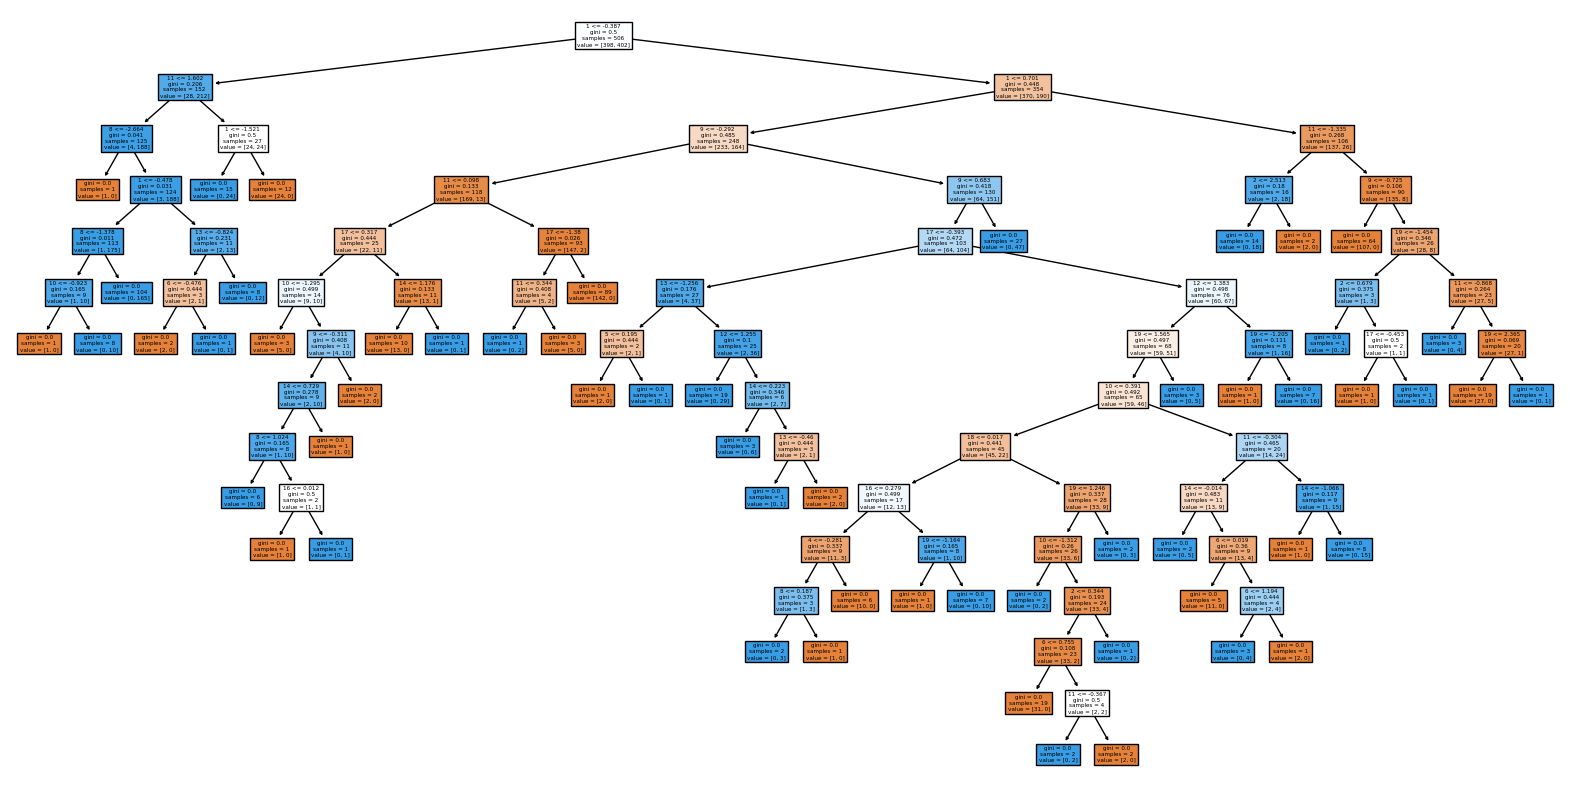

Accuracy: 0.915


In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE to select top 20 features
selector = RFE(rf_classifier, n_features_to_select=20, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Use only the selected features
X_selected = selector.transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest classifier on selected features
rf_classifier.fit(X_train, y_train)

# Visualize a tree from the forest
plt.figure(figsize=(20, 10))
tree = rf_classifier.estimators_[0]  # Selecting the first tree
plot_tree(tree, feature_names=[str(i) for i in range(X_selected.shape[1])], filled=True)
plt.show()

# Calculate and display accuracy
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

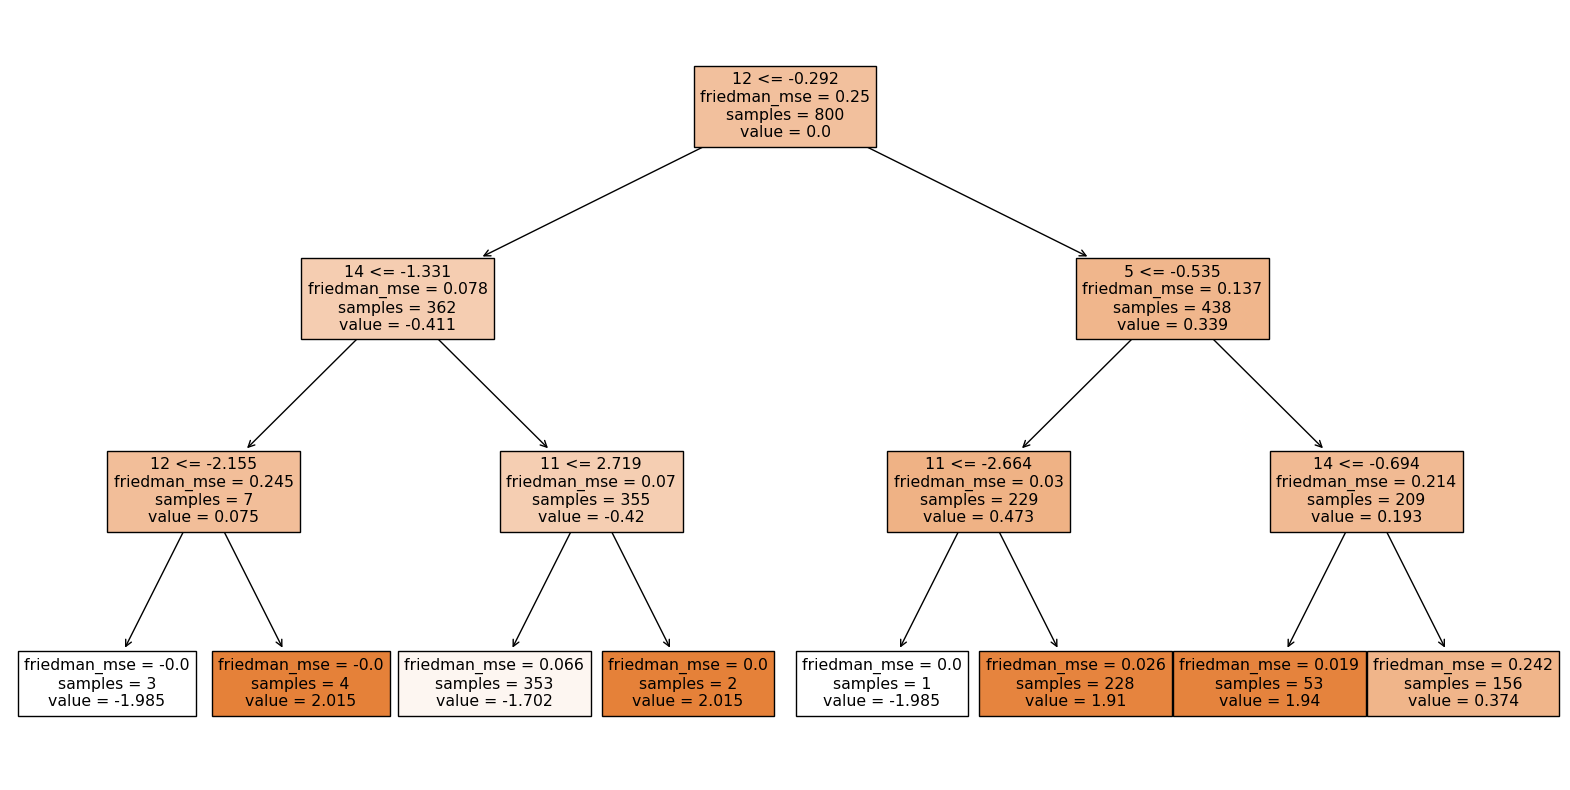

Accuracy: 0.91


In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize RFE to select top 20 features
selector = RFE(gb_classifier, n_features_to_select=20, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Use only the selected features
X_selected = selector.transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier on selected features
gb_classifier.fit(X_train, y_train)

# Visualize a tree from the ensemble
plt.figure(figsize=(20, 10))
tree = gb_classifier.estimators_[0, 0]  # Selecting the first tree from the first estimator
plot_tree(tree, feature_names=[str(i) for i in range(X_selected.shape[1])], filled=True)
plt.show()

# Calculate and display accuracy
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE to select top 20 features
selector = RFE(estimator=rf_classifier, n_features_to_select=20, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Use only the selected features
X_selected = selector.transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_selected.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
25/25 [==============================] - 4s 17ms/step - loss: 0.6579 - accuracy: 0.6087 - val_loss: 0.5778 - val_accuracy: 0.7900
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.8075 - val_loss: 0.4723 - val_accuracy: 0.8350
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4285 - accuracy: 0.8325 - val_loss: 0.4037 - val_accuracy: 0.8600
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.8575 - val_loss: 0.3657 - val_accuracy: 0.8500
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3306 - accuracy: 0.8700 - val_loss: 0.3462 - val_accuracy: 0.8600
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8825 - val_loss: 0.3378 - val_accuracy: 0.8700
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8838 - val_loss: 0.3353 - val_accuracy: 0.8700
Epoch 8/100


TODO: print selected feats, plot steps, show loss, make sure proper random

addition of dropout layers

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE to select top 20 features
selector = RFE(estimator=rf_classifier, n_features_to_select=20, step=1)

# Fit RFE
selector = selector.fit(X_scaled, y)

# Use only the selected features
X_selected = selector.transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_selected.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
25/25 [==============================] - 2s 11ms/step - loss: 0.6442 - accuracy: 0.6137 - val_loss: 0.5463 - val_accuracy: 0.8200
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7812 - val_loss: 0.4457 - val_accuracy: 0.8800
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.8238 - val_loss: 0.3784 - val_accuracy: 0.8900
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3903 - accuracy: 0.8487 - val_loss: 0.3438 - val_accuracy: 0.8750
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3730 - accuracy: 0.8438 - val_loss: 0.3311 - val_accuracy: 0.8800
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8587 - val_loss: 0.3232 - val_accuracy: 0.8900
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.8625 - val_loss: 0.3207 - val_accuracy: 0.8800
Epoch 8/100
